# Mechanics of Billiard

Physics Lab, experiment No. 4

## Package importing & data importing

As I always did...

data1.csv : Expt. 1.1, 1.2, 1.3 (r/g/r/g/r/g disk, 18 columns)

data2_1.csv : Expt. 2.11, 2.12, 2.13 (r/g/r/g/r/g disk, 18 columns)

data2_2.csv : Expt. 2.21, 2.22, 2.23 (r/g/r/g/r/g disk, 18 columns)

data2_3.csv : Expt. 2.31, 2.32, 2.33 (r/g/r/g/r/g disk, 18 columns)

data3.csv : Expt. 3.1, 3.2, 3.3 (g/g/g disk, 9 columns)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit as cf

data_1 = pd.read_csv('data1.csv', sep=',')
data_21 = pd.read_csv('data2_1.csv', sep=',')
data_22 = pd.read_csv('data2_2.csv', sep=',')
data_23 = pd.read_csv('data2_3.csv', sep=',')
data_3 = pd.read_csv('data3.csv', sep=',')

exp11r = (data_1[["t1","x1","y1"]].dropna(how="any")).values
exp11g = (data_1[["t2","x2","y2"]].dropna(how="any")).values
exp12r = (data_1[["t3","x3","y3"]].dropna(how="any")).values
exp12g = (data_1[["t4","x4","y4"]].dropna(how="any")).values
exp13r = (data_1[["t5","x5","y5"]].dropna(how="any")).values
exp13g = (data_1[["t6","x6","y6"]].dropna(how="any")).values

exp211r = (data_21[["t1","x1","y1"]].dropna(how="any")).values
exp211g = (data_21[["t2","x2","y2"]].dropna(how="any")).values
exp212r = (data_21[["t3","x3","y3"]].dropna(how="any")).values
exp212g = (data_21[["t4","x4","y4"]].dropna(how="any")).values
exp213r = (data_21[["t5","x5","y5"]].dropna(how="any")).values
exp213g = (data_21[["t6","x6","y6"]].dropna(how="any")).values

exp221r = (data_22[["t1","x1","y1"]].dropna(how="any")).values
exp221g = (data_22[["t2","x2","y2"]].dropna(how="any")).values
exp222r = (data_22[["t3","x3","y3"]].dropna(how="any")).values
exp222g = (data_22[["t4","x4","y4"]].dropna(how="any")).values
exp223r = (data_22[["t5","x5","y5"]].dropna(how="any")).values
exp223g = (data_22[["t6","x6","y6"]].dropna(how="any")).values

exp231r = (data_23[["t1","x1","y1"]].dropna(how="any")).values
exp231g = (data_23[["t2","x2","y2"]].dropna(how="any")).values
exp232r = (data_23[["t3","x3","y3"]].dropna(how="any")).values
exp232g = (data_23[["t4","x4","y4"]].dropna(how="any")).values
exp233r = (data_23[["t5","x5","y5"]].dropna(how="any")).values
exp233g = (data_23[["t6","x6","y6"]].dropna(how="any")).values

exp31g = (data_3[["t1","x1","y1"]].dropna(how="any")).values
exp32g = (data_3[["t2","x2","y2"]].dropna(how="any")).values
exp33g = (data_3[["t3","x3","y3"]].dropna(how="any")).values

## Plots of Experiment 1

Red and green disks are indicated with the color of marker.

In [2]:
def plot_the_data(expt_r, expt_g, m, n):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(expt_r[:,1], expt_r[:,2], marker='o', color='red', s=15)
    ax.scatter(expt_g[:,1], expt_g[:,2], marker='o', color='green', s=15)
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.title('x and y coordinates of experiment {}-{}'.format(m,n))
    plt.show()

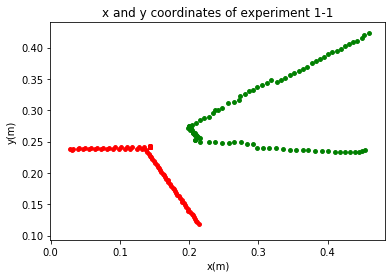

In [3]:
plot_the_data(exp11r,exp11g,1,1)

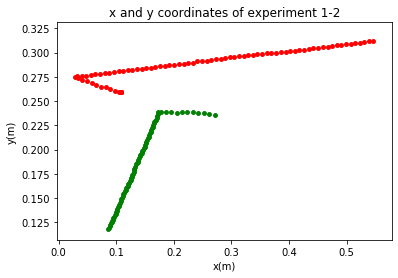

In [4]:
plot_the_data(exp12r,exp12g,1,2)

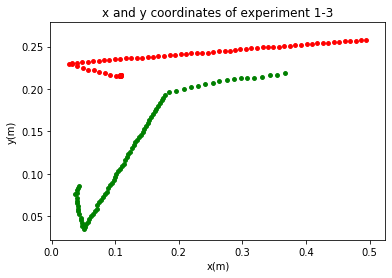

In [5]:
plot_the_data(exp13r,exp13g,1,3)

## Analysis of Experiment 2

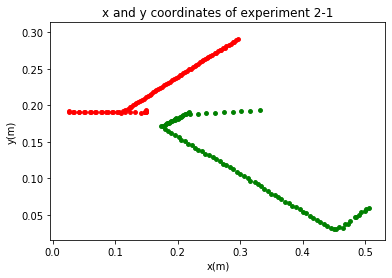

In [10]:
plot_the_data(exp211r,exp211g,2,1)

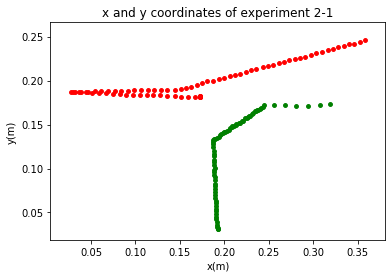

In [11]:
plot_the_data(exp212r,exp212g,2,1)

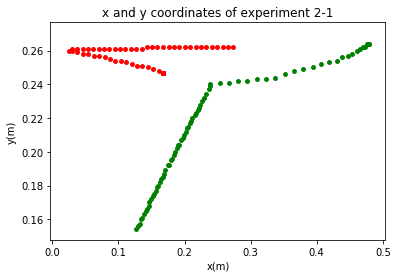

In [12]:
plot_the_data(exp213r,exp213g,2,1)

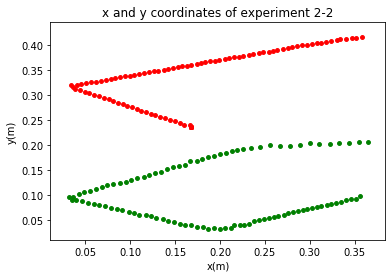

In [13]:
plot_the_data(exp221r,exp221g,2,2)

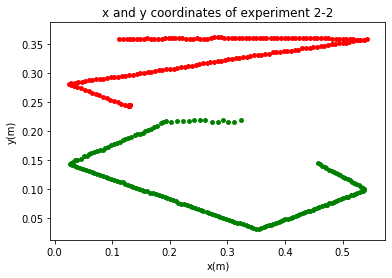

In [14]:
plot_the_data(exp222r,exp222g,2,2)

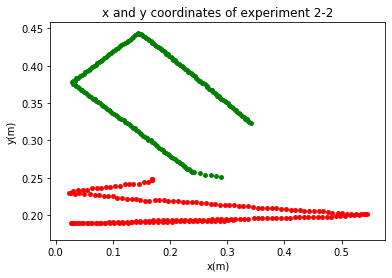

In [15]:
plot_the_data(exp223r,exp223g,2,2)

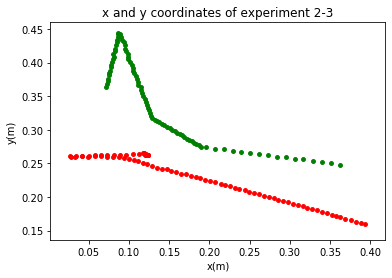

In [16]:
plot_the_data(exp231r,exp231g,2,3)

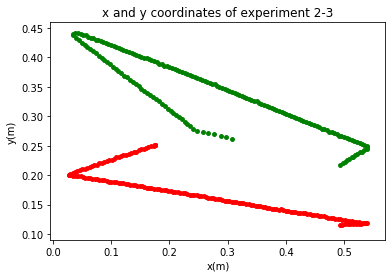

In [17]:
plot_the_data(exp232r,exp232g,2,3)

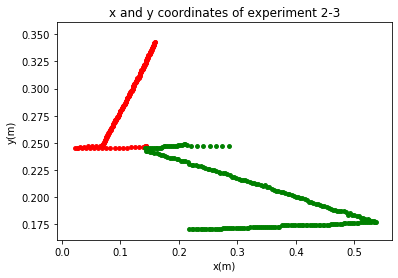

In [18]:
plot_the_data(exp233r,exp233g,2,3)

## Analysis of Experiment 3

Clearly, data for the Expt. 3-1 is weird... (so I did not use this data in analysis.)

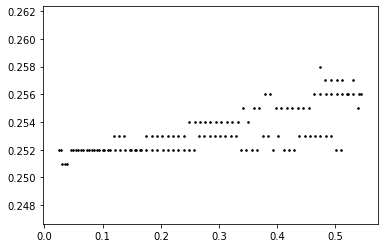

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(exp31g[:,1], exp31g[:,2], marker='.', color='black', s = 10)
plt.show()

Following codes are "trial" for the velocity analysis. But I did velocity analysis in Excel.

In [7]:
def Calculate_velocity(expt):
    v = np.zeros(len(expt) - 1)
    t = expt[:,0]
    x = expt[:,1]
    y = expt[:,2]
    
    xt = np.append(np.array([0]), x)
    yt = np.append(np.array([0]), y)
    tt = np.append(np.array([0]), t)
    
    x = np.append(x, np.array([0]))
    y = np.append(y, np.array([0]))
    t = np.append(t, np.array([0]))
    
    timestep = t - tt + 1e-8
    xstep = x - xt
    ystep = y - yt
    xstep[len(expt)] = 0.0
    ystep[len(expt)] = 0.0
    
    v = np.sqrt((xstep/timestep) ** 2 + (ystep/timestep) ** 2)
    vx = xstep / timestep
    vy = ystep / timestep
    v[0] = 0.0
    vx[0] = 0.0
    vy[0] = 0.0
    
    return v, vx, vy

In [8]:
v_32, v_32_x, v_32_y = Calculate_velocity(exp32g)
v_33, v_33_x, v_33_y = Calculate_velocity(exp33g)